### Import Libraries and Modules ###

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import math

### Load the dataset ###

In [36]:
data = pd.read_csv('C:/Users/SMILE/Documents/data_analysis_with_python/Dataset/data_science_salaries.csv')

In [37]:
data

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


### Check dataset information ###

In [38]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')
(6599, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
me

### Check null values ###

In [39]:
data.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

### Frequency distribution with qualitative variables ###

In [40]:
data['work_year'].value_counts()

work_year
2023    4625
2022    1112
2024     571
2021     216
2020      75
Name: count, dtype: int64

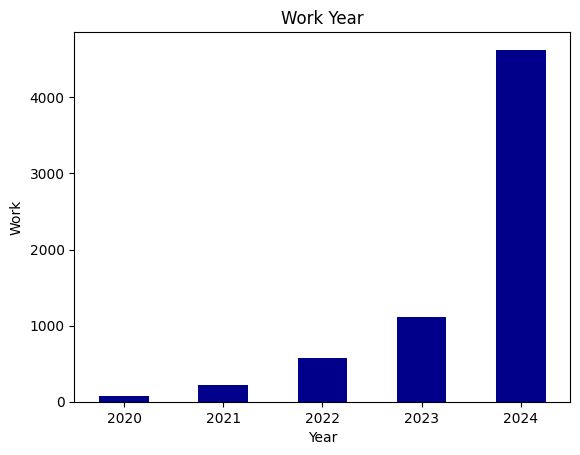

In [43]:
data['work_year'].value_counts()
year_data = {'Year':[2020,2021,2022,2023,2024],
            'Work':[75,216,571,1112,4625]}
year_df = pd.DataFrame(year_data)
year_df.plot(kind='bar',x='Year',y='Work',title='Work Year',xlabel='Year',ylabel='Work',rot=0,color='darkblue',legend=False)
plt.show()

In [44]:
data['experience_level'].value_counts()

experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64

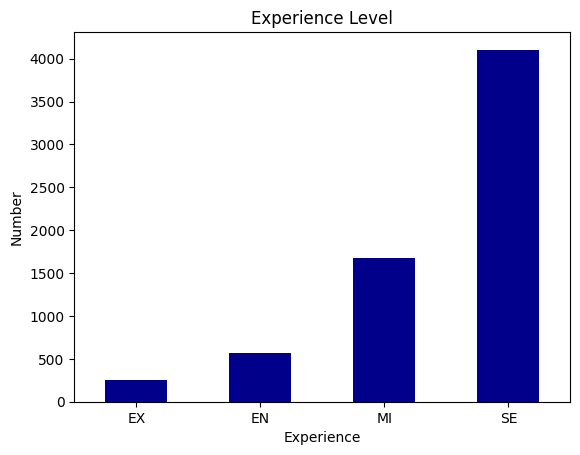

In [45]:
data['experience_level'].value_counts()
exp_data = {'Experience Level':['EX','EN','MI','SE'],
            'Number':[254,565,1675,4105]}
exp_df = pd.DataFrame(exp_data)
exp_df.plot(kind='bar',x='Experience Level',y='Number',title='Experience Level',xlabel='Experience',ylabel='Number',color='darkblue',rot=0,legend=False)
plt.show()

In [46]:
data['employment_type'].value_counts()

employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64

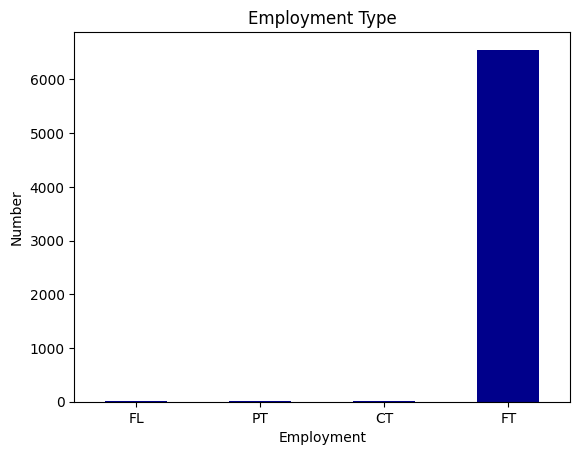

In [47]:
data['employment_type'].value_counts()
emp_data = {'Employment Type':['FL','PT','CT','FT'],
            'Number':[12,16,19,6552]}
emp_df = pd.DataFrame(emp_data)
emp_df.plot(kind='bar',x='Employment Type',y='Number',title='Employment Type',xlabel='Employment',ylabel='Number',color='darkblue',legend=False)
plt.xticks(rotation=0)
plt.show()

In [48]:
data['job_title'].unique()

array(['Data Engineer', 'Data Scientist', 'BI Developer',
       'Research Analyst', 'Business Intelligence Developer',
       'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
       'Machine Learning Scientist', 'Machine Learning Engineer',
       'Data Science Manager', 'Applied Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Science',
       'Research Scientist', 'Research Engineer',
       'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
       'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
       'Data Science Consultant', 'AI Architect',
       'Data Analytics Manager', 'Data Science Engineer',
       'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
       'Prompt Engineer', 'Data Science Lead',
       'Busi

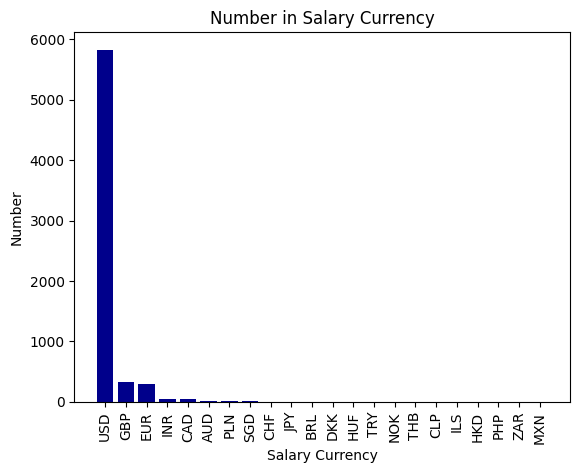

In [49]:
sal_cur = data['salary_currency'].value_counts()
plt.bar(sal_cur.index, sal_cur.values, color='darkblue')
plt.xlabel('Salary Currency')
plt.ylabel('Number')
plt.title('Number in Salary Currency')
plt.xticks(rotation=90)
plt.show()

In [50]:
print(data['salary_in_usd'].min())
print(data['salary_in_usd'].max())

15000
750000


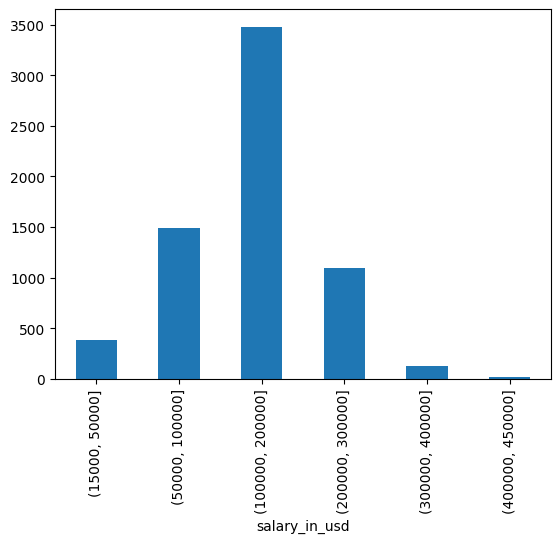

In [51]:
salaryusd_gp = pd.cut(data['salary_in_usd'],[15000,50000,100000,200000,300000,400000,450000],right=True).value_counts(sort=False)
salaryusd_df = pd.DataFrame(salaryusd_gp)
salaryusd_df.plot(kind='bar',width=0.5,legend=None,rot=90)
plt.show()

In [52]:
import pandas as pd
import numpy as np

df= pd.DataFrame({'number': np.random.randint(1,100,10)})
df['bins'] = pd.cut(x=df['number'], bins=[1,20,40,60,80,100])
print(df)
print(df['bins'].unique())

   number       bins
0      14    (1, 20]
1      11    (1, 20]
2      55   (40, 60]
3      23   (20, 40]
4      24   (20, 40]
5      71   (60, 80]
6      82  (80, 100]
7      33   (20, 40]
8       3    (1, 20]
9      30   (20, 40]
[(1, 20], (40, 60], (20, 40], (60, 80], (80, 100]]
Categories (5, interval[int64, right]): [(1, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]


In [53]:
data['company_location'].mode()

0    United States
Name: company_location, dtype: object

In [54]:
data['employee_residence'].mode()

0    United States
Name: employee_residence, dtype: object

In [55]:
data['company_size'].value_counts()

company_size
Medium    5860
Large      569
Small      170
Name: count, dtype: int64

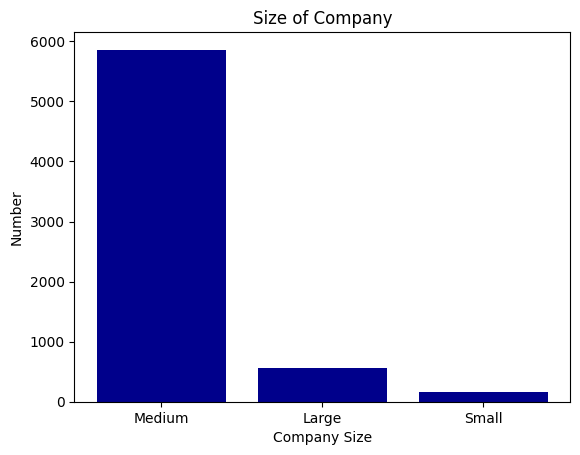

In [56]:
com_size = data['company_size'].value_counts()
plt.bar(com_size.index, com_size.values, color='darkblue')
plt.xlabel('Company Size')
plt.ylabel('Number')
plt.title('Size of Company')
plt.show()

### Statistics analysis with quantitative variables ###

In [57]:
data.keys()

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

<Axes: ylabel='Count'>

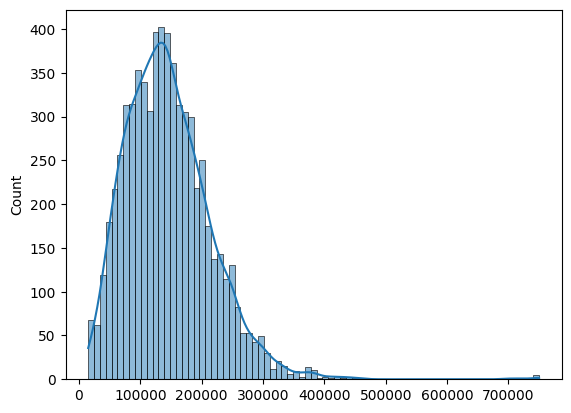

In [58]:
#before outliers
salary_df = list(data['salary_in_usd'])
sns.histplot(salary_df,kde=True)

<Axes: ylabel='Count'>

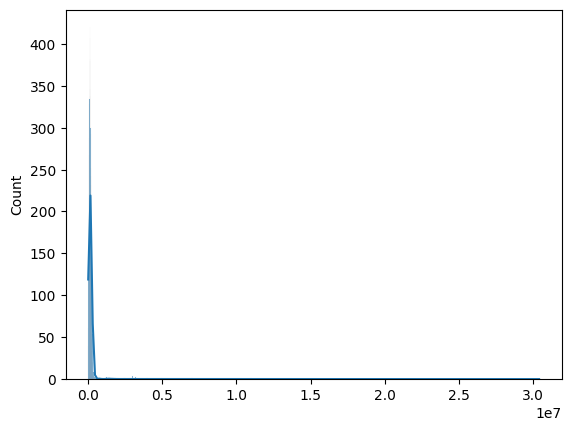

In [59]:
#before outliers
salary_df = list(data['salary'])
sns.histplot(salary_df,kde=True)

In [60]:
#before outliers
data['salary_in_usd'].describe()

count      6599.000000
mean     145560.558569
std       70946.838070
min       15000.000000
25%       95000.000000
50%      138666.000000
75%      185000.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

In [61]:
#before outliers
data['salary'].describe()

count    6.599000e+03
mean     1.792833e+05
std      5.263722e+05
min      1.400000e+04
25%      9.600000e+04
50%      1.400000e+05
75%      1.875000e+05
max      3.040000e+07
Name: salary, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24a56fa0130>,
 'caps': [<matplotlib.lines.Line2D at 0x24a56fa0670>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a56f98e50>],
 'medians': [<matplotlib.lines.Line2D at 0x24a56fa0bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a56fa0e50>],
 'means': []}

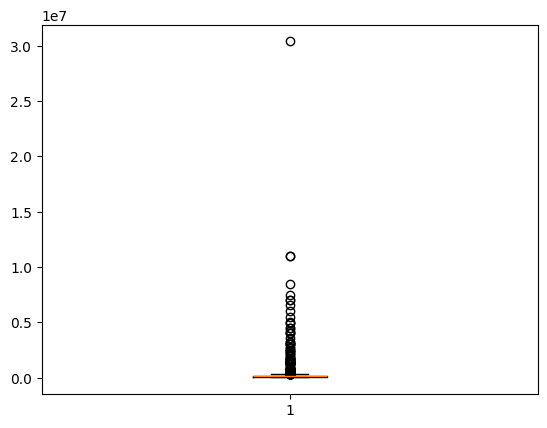

In [62]:
plt.boxplot(data['salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24a5702a640>,
 'caps': [<matplotlib.lines.Line2D at 0x24a5702ab80>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a5702a3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x24a57034100>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a570343a0>],
 'means': []}

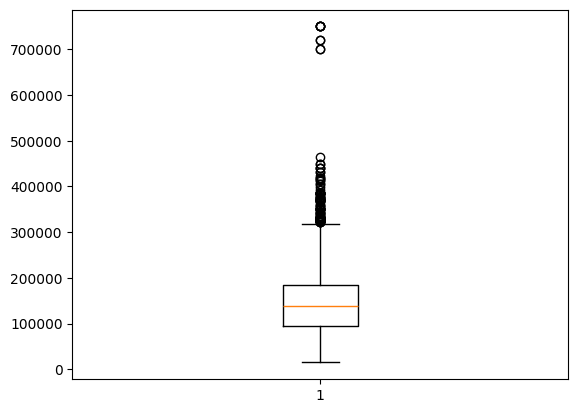

In [63]:
plt.boxplot(data['salary_in_usd'])

In [64]:
#skewness and kurtosis
salary_sk = sc.describe(data['salary'])
salary_usd = sc.describe(data['salary_in_usd'])
print(salary_sk)
print(salary_usd)

DescribeResult(nobs=6599, minmax=(14000, 30400000), mean=179283.25549325655, variance=277067737490.2294, skewness=34.734158627134555, kurtosis=1736.9955770712752)
DescribeResult(nobs=6599, minmax=(15000, 750000), mean=145560.55856948023, variance=5033453832.064128, skewness=1.3603961878629054, kurtosis=6.488091937954394)


In [210]:
#IQR function
def IQR_func(dataset):
    q1,q3 = np.percentile(dataset,[25,75])
    print(q1,q3)
    IQR = q3-q1
    print(IQR)
    lower_value = q1 - (1.5*IQR)
    upper_value = q3 + (1.5*IQR)
    print(lower_value)
    print(upper_value)
    dataset = dataset[dataset < upper_value]
    dataset = dataset[dataset > lower_value]
    print(len(dataset))

In [211]:
IQR_func(data['salary'])

96000.0 187500.0
91500.0
-41250.0
324750.0
6439


In [70]:
upper = np.where(data['salary']>=324750)[0]
lower = np.where(data['salary']<=41250)[0]
print(upper.sum())
print(lower.sum())
print(data['salary'].shape)

633030
1094359
(6599,)


In [71]:
data[data['salary']>=324750].count()

job_title             160
experience_level      160
employment_type       160
work_models           160
work_year             160
employee_residence    160
salary                160
salary_currency       160
salary_in_usd         160
company_location      160
company_size          160
dtype: int64

In [72]:
data[data['salary']<=41250].count()

job_title             218
experience_level      218
employment_type       218
work_models           218
work_year             218
employee_residence    218
salary                218
salary_currency       218
salary_in_usd         218
company_location      218
company_size          218
dtype: int64

In [228]:
#drop outliers
new_df = data[(data['salary']<250000)&(data['salary']>30000)]
new_df.shape
new_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6593,Principal Data Scientist,Senior-level,Full-time,Remote,2020,Germany,130000,EUR,148261,Germany,Medium
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


{'whiskers': [<matplotlib.lines.Line2D at 0x24a67f926d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a67f92c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a67f92400>],
 'medians': [<matplotlib.lines.Line2D at 0x24a67f9b190>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a67f9b430>],
 'means': []}

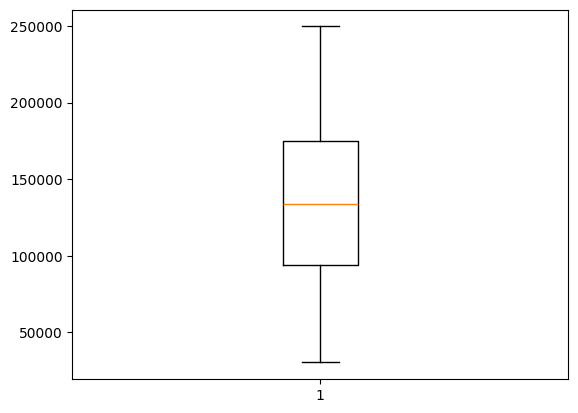

In [229]:
plt.boxplot(new_df['salary'])

<Axes: xlabel='salary', ylabel='Count'>

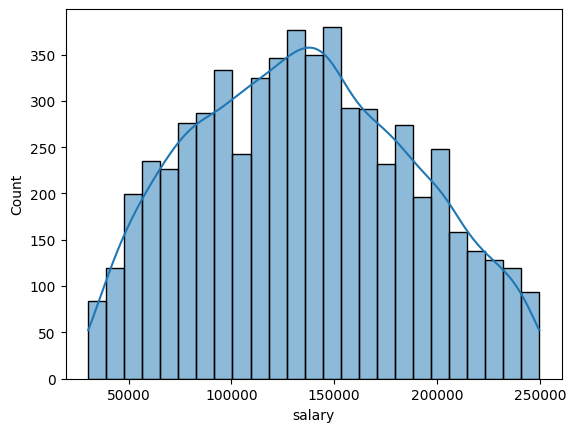

In [230]:
#after drop outliers
sns.histplot(new_df['salary'],kde=True)

In [231]:
IQR_func(data['salary_in_usd'])

95000.0 185000.0
90000.0
-40000.0
320000.0
6492


In [116]:
upper = np.where(data['salary_in_usd']>=320000)[0]
lower = np.where(data['salary_in_usd']<=40000)[0]
print(upper.sum())
print(lower.sum())
print(data['salary_in_usd'].shape)

283890
1041862
(6599,)


In [118]:
data[data['salary_in_usd']>=320000].count()

job_title             107
experience_level      107
employment_type       107
work_models           107
work_year             107
employee_residence    107
salary                107
salary_currency       107
salary_in_usd         107
company_location      107
company_size          107
dtype: int64

In [117]:
data[data['salary_in_usd']<=40000].count()

job_title             196
experience_level      196
employment_type       196
work_models           196
work_year             196
employee_residence    196
salary                196
salary_currency       196
salary_in_usd         196
company_location      196
company_size          196
dtype: int64

In [172]:
#drop outliers
new_df = data[(data['salary_in_usd']<270000)&(data['salary_in_usd']>23000)]
new_df.shape
new_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6593,Principal Data Scientist,Senior-level,Full-time,Remote,2020,Germany,130000,EUR,148261,Germany,Medium
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


{'whiskers': [<matplotlib.lines.Line2D at 0x24a6142bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a61438520>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a6142bd00>],
 'medians': [<matplotlib.lines.Line2D at 0x24a61438a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a61438d00>],
 'means': []}

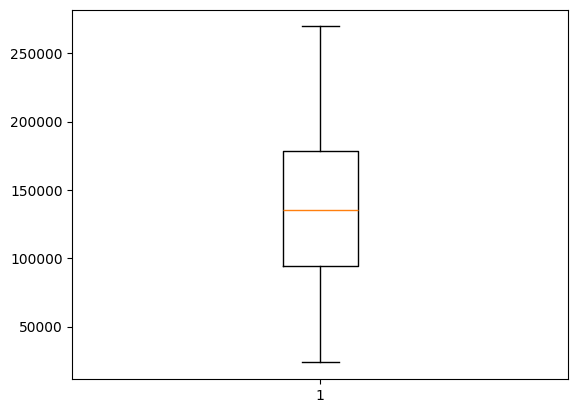

In [173]:
#after drop outliers
plt.boxplot(new_df['salary_in_usd'])

<Axes: xlabel='salary_in_usd', ylabel='Count'>

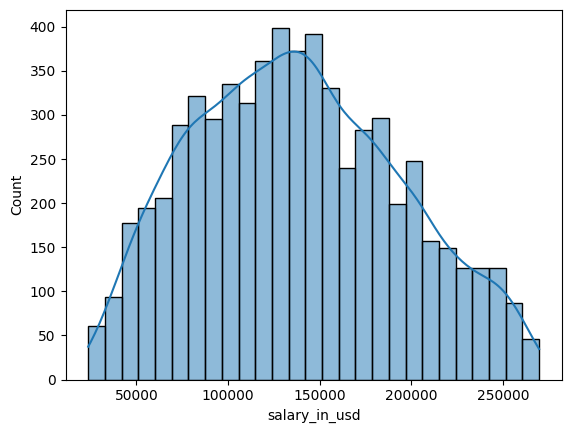

In [174]:
#after drop outliers
sns.histplot(new_df['salary_in_usd'],kde=True)

In [232]:
#after drop outliers
#skewness and kurtosis
salary_sk = sc.describe(new_df['salary'])
salary_usd = sc.describe(new_df['salary_in_usd'])
print(salary_sk)
print(salary_usd)

DescribeResult(nobs=5950, minmax=(30390, 249600), mean=135196.04655462186, variance=2776777559.7999845, skewness=0.12272867891260408, kurtosis=-0.8114854108500493)
DescribeResult(nobs=5950, minmax=(18160, 249600), mean=135771.2156302521, variance=2707540260.766574, skewness=0.15238742536526764, kurtosis=-0.8019381791866897)


In [237]:
r = new_df.corr(method='pearson',numeric_only=True)
r

,work_year,salary,salary_in_usd
work_year,1.000000,0.110242,0.115000
salary,0.110242,1.000000,0.988517
salary_in_usd,0.115000,0.988517,1.000000


<Axes: >

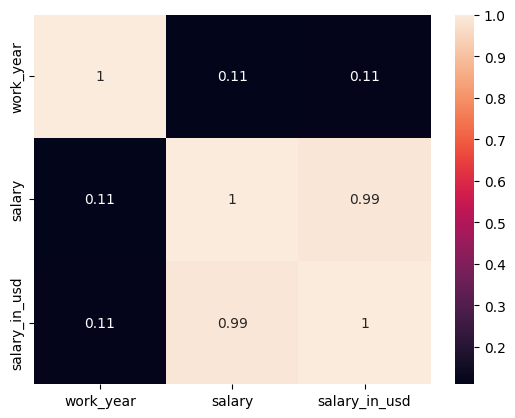

In [241]:
sns.heatmap(r,annot=True)